# **Binary Classification Use Case Demonstration**

Using Keras library to build a Deep Neural Network to do binary classification

**Video Tutorial:** https://www.youtube.com/watch?v=CQTCS8SO8bs

##### **Author: Partha Seetala**

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.initializers import he_normal
from keras.optimizers import Adam
from sklearn.datasets import make_circles

# **Utility Functions**

**Let's create some synthetic data generation helper functions**

In [ ]:
DATA_RANGE = 10  # we'll generate data between [-DATA_RANGE, +DATA_RAGE]

def generate_circle_data(nsamples=1000, radius=5, range_lim=10, random_seed=42):
    np.random.seed(random_seed)

    # Generate random points within the specified range
    x = np.random.uniform(-range_lim, range_lim, (nsamples, 2))

    # Calculate the distance of each point from the origin
    distances = np.sqrt(np.sum(x**2, axis=1))

    # Label points inside the circle as 1, outside as 0
    y = (distances <= radius).astype(int)
    return x, y

def generate_rectangle_data(nsamples=1000,
                            rect_xmin=-DATA_RANGE/2, rect_xmax=DATA_RANGE/2,
                            rect_ymin=-DATA_RANGE/3, rect_ymax=DATA_RANGE/3,
                            range_lim=DATA_RANGE, random_seed=42):
    np.random.seed(random_seed)

    # Generate random points within the specified range
    x = np.random.uniform(-range_lim, range_lim, (nsamples, 2))

    # Label points inside the rectangle as 1, outside as 0
    y = np.where((x[:, 0] >= rect_xmin) & (x[:, 0] <= rect_xmax) &
                 (x[:, 1] >= rect_ymin) & (x[:, 1] <= rect_ymax), 1, 0)

    return x, y

def generate_triangle_data(nsamples=1000, range_lim=10, random_seed=42):
    np.random.seed(random_seed)

    # Generate random points within the specified range
    x = np.random.uniform(-range_lim, range_lim, (nsamples, 2))

    # Function to check if a point is inside a triangle
    def is_point_in_triangle(point, v1, v2, v3):
        def sign(p1, p2, p3):
            return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

        b1 = sign(point, v1, v2) < 0.0
        b2 = sign(point, v2, v3) < 0.0
        b3 = sign(point, v3, v1) < 0.0

        return ((b1 == b2) & (b2 == b3))

    triangle_vertices = [(-DATA_RANGE, DATA_RANGE/4.0),
                         (-DATA_RANGE/2.0, DATA_RANGE),
                         (0.0, 0.0)]
    v1, v2, v3 = triangle_vertices
    y = np.array([1 if is_point_in_triangle(point, v1, v2, v3) else 0 for point in x])

    return x, y

def generate_training_data(nsamples, type="circle"):
    if type == "rectangle":
        x, y = generate_rectangle_data(nsamples=nsamples)
    elif type == "triangle":
        x, y = generate_triangle_data(nsamples=nsamples)
    else:
        x, y = generate_circle_data(nsamples=nsamples)
    return x, y

# Plot the data
def plot_data(x, y, label1="Feature1", label2="Feature2", title="Plotting Feature1 and Feature2"):
    plt.figure(figsize=(6, 6))
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter', alpha=0.5)
    plt.xlabel(label1)
    plt.ylabel(label2)
    plt.title(title)
    plt.show()

## CODE

**Generate some data to train the model**

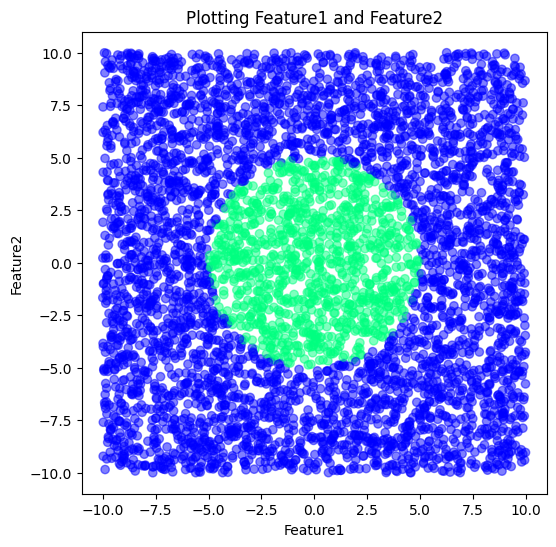

In [ ]:
x, y = generate_training_data(5000, type="circle")
plot_data(x, y)

**Create a Neural Network to do Binary Classification**

In [ ]:
# Define the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Train the model so that it can identify which (x,y) is yellow and which is purple**

In [ ]:
# Train the model
model.fit(x, y, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(x, y, verbose=0)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7609 - loss: 0.4075
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8352 - loss: 0.2700
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9119 - loss: 0.1887
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9585 - loss: 0.1263
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9835 - loss: 0.0796
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0623
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9837 - loss: 0.0535
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0458
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0438
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9914 - loss: 0.0374
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0377
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━━

**Let's now test how well our model can predict**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


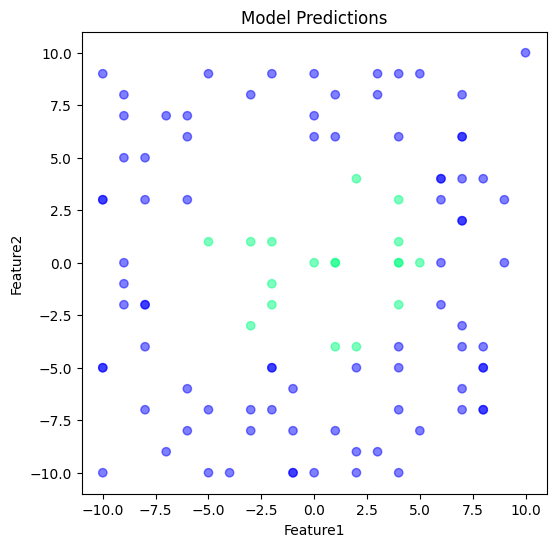

In [ ]:
# Generate some sample data
def generate_data_for_testing(nsamples, type="line"):
    x = []

    if type == "line":
        incr = (2.0 * DATA_RANGE)/nsamples
        f1 = -DATA_RANGE
        f2 = -DATA_RANGE
        for i in range(nsamples+1):
            f1 += incr
            f2 += incr
            x.append([f1, f2])
    else:
        x.append([-DATA_RANGE, -DATA_RANGE])
        for i in range(nsamples+1):
            f1 = random.randrange(-DATA_RANGE, DATA_RANGE)
            f2 = random.randrange(-DATA_RANGE, DATA_RANGE)
            x.append([f1, f2])
        x.append([DATA_RANGE, DATA_RANGE])
    return np.array(x)

xtest = generate_data_for_testing(100, type="random")

# Perform inference on the data
ypred = model.predict(xtest)
ypred_classes = (ypred > 0.5).astype(int).flatten()

# Plotting the predicted data
plot_data(xtest, ypred_classes, title="Model Predictions")
